In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
grad=pd.read_csv('grademployment2.csv',na_values='na')

In [4]:
grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 12 columns):
year                         289 non-null int64
university                   289 non-null object
school                       285 non-null object
degree                       289 non-null object
employment_rate_overall      264 non-null float64
employment_rate_permanent    264 non-null float64
basic_monthly_mean           264 non-null float64
basic_monthly_median         264 non-null float64
gross_monthly_mean           264 non-null float64
gross_monthly_median         264 non-null float64
gross_mthly_25_percentile    264 non-null float64
gross_mthly_75_percentile    264 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 27.2+ KB


In [5]:
grad.head(3)

,year,university,school,degree,employment_rate_overall,employment_rate_permanent,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701.0,3200.0,3727.0,3350.0,2900.0,4000.0
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850.0,2700.0,2938.0,2700.0,2700.0,2900.0
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053.0,3000.0,3214.0,3000.0,2700.0,3500.0


In [6]:
grad.replace(to_replace='Nanyang Technological University',value='NTU',inplace=True)

In [7]:
grad.replace(to_replace='National University of Singapore',value='NUS',inplace=True)

In [8]:
grad.replace(to_replace='Singapore Institute of Technology',value='SIT',inplace=True)

In [9]:
grad.replace(to_replace='Singapore Management University',value='SMU',inplace=True)

In [10]:
grad.replace(to_replace='Singapore University of Technology and Design',value='SUTD',inplace=True)

Text(0.5,1,'Average monthly salary by faculty (All)')

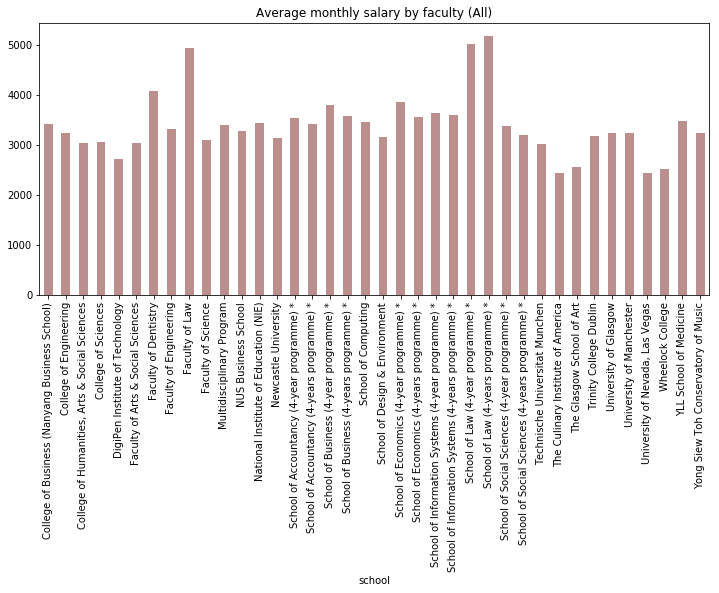

In [11]:
grad.groupby('school')['basic_monthly_mean'].mean().plot(kind='bar',color='rosybrown',figsize=(12,5))
plt.title('Average monthly salary by faculty (All)')

Text(0.5,1,'Average monthly salary by faculty (NUS)')

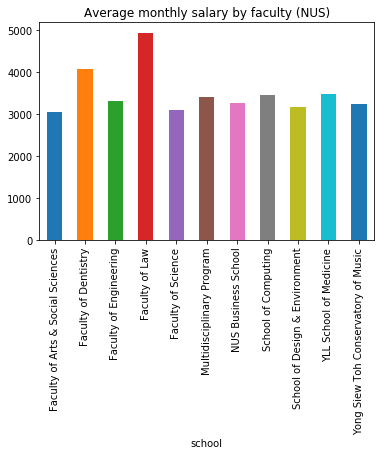

In [19]:
grad[grad['university']=='NUS'].groupby('school')['basic_monthly_mean'].mean().plot(kind='bar')
plt.title('Average monthly salary by faculty (NUS)')

In [13]:
grad[grad['university']=='NUS'].groupby('school')['basic_monthly_mean'].median()

school
Faculty of Arts & Social Sciences      3098.0
Faculty of Dentistry                   4054.0
Faculty of Engineering                 3278.0
Faculty of Law                         4922.0
Faculty of Science                     3152.0
Multidisciplinary Program              3400.0
NUS Business School                    3199.0
School of Computing                    3313.5
School of Design & Environment         2989.0
YLL School of Medicine                 3175.0
Yong Siew Toh Conservatory of Music    3244.0
Name: basic_monthly_mean, dtype: float64

In [14]:
grad[(grad['basic_monthly_mean']<3000)&(grad['year']==2015)]

,year,university,school,degree,employment_rate_overall,employment_rate_permanent,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
217,2015,NTU,"College of Humanities, Arts & Social Sciences",Chinese,81.8,76.6,2978.0,3000.0,3045.0,3200.0,2800.0,3500.0
218,2015,NTU,"College of Humanities, Arts & Social Sciences",Communication Studies,85.1,74.4,2921.0,2900.0,3008.0,3000.0,2600.0,3330.0
224,2015,NTU,College of Sciences,Biomedical Science (Traditional Chinese Medici...,100.0,100.0,2832.0,2800.0,2882.0,2800.0,2500.0,3105.0
226,2015,NTU,College of Sciences,Chemistry & Biological Chemistry,83.9,72.3,2960.0,2900.0,3139.0,3000.0,2800.0,3500.0
233,2015,NUS,Faculty of Arts & Social Sciences,Bachelor of Arts,88.4,74.6,2839.0,2880.0,2999.0,3000.0,2700.0,3215.0
238,2015,NUS,NUS Business School,Bachelor of Business Administration (Accountancy),97.6,97.6,2817.0,2850.0,2983.0,2850.0,2700.0,2960.0
248,2015,NUS,School of Design & Environment,Bachelor of Arts (Industrial Design),72.0,60.0,2907.0,3000.0,2908.0,3000.0,2700.0,3200.0
249,2015,NUS,School of Design & Environment,Bachelor of Science (Project and Facilities Ma...,94.3,90.8,2989.0,3000.0,3067.0,3000.0,2800.0,3215.0
268,2015,NUS,Faculty of Science,Bachelor of Science,84.3,64.2,2859.0,2900.0,3052.0,3000.0,2620.0,3200.0


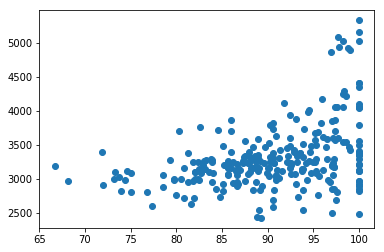

In [15]:
plt.scatter(x='employment_rate_overall',y='basic_monthly_mean',data=grad)

In [16]:
# Haha since I'm an Accountancy student let's see the pay stats for my course LOL

grad[(grad['degree'].str.contains('Accountancy'))& (grad['year']==2015)].iloc[3]

year                                                                      2015
university                                                                 NUS
school                                                     NUS Business School
degree                       Bachelor of Business Administration (Accountan...
employment_rate_overall                                                   98.6
employment_rate_permanent                                                 98.6
basic_monthly_mean                                                        3547
basic_monthly_median                                                      3000
gross_monthly_mean                                                        3587
gross_monthly_median                                                      3000
gross_mthly_25_percentile                                                 2850
gross_mthly_75_percentile                                                 3634
Name: 239, dtype: object

In [18]:
pd.unique(grad['year'])

array([2013, 2014, 2015], dtype=int64)